In [1]:
# 4_dca_evaluation.ipynb - Decision Curve Analysis for Stroke Prediction

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score


In [2]:

# Load the cleaned dataset
df = pd.read_csv('preprocessed_stroke_data.csv')

# Split features and target
X = df.drop('stroke', axis=1)
y = df['stroke']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities
y_prob = model.predict_proba(X_test)[:, 1]




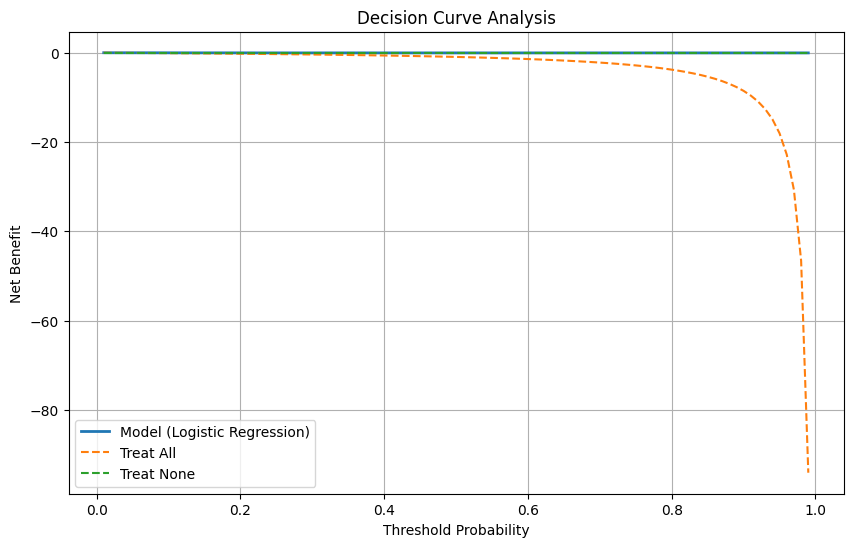

In [3]:
# Decision Curve Analysis Function
def decision_curve(y_true, y_prob, thresholds=np.arange(0.01, 1.0, 0.01)):
    net_benefits = []
    treat_all = []
    for thresh in thresholds:
        predicted = (y_prob >= thresh).astype(int)
        tp = np.sum((predicted == 1) & (y_true == 1))
        fp = np.sum((predicted == 1) & (y_true == 0))
        fn = np.sum((predicted == 0) & (y_true == 1))

        nb = (tp / len(y_true)) - (fp / len(y_true)) * (thresh / (1 - thresh))
        treat_all_nb = (np.sum(y_true) / len(y_true)) - ((len(y_true) - np.sum(y_true)) / len(y_true)) * (thresh / (1 - thresh))

        net_benefits.append(nb)
        treat_all.append(treat_all_nb)

    return thresholds, net_benefits, treat_all

# Generate DCA
thresholds, model_nb, treat_all_nb = decision_curve(y_test.values, y_prob)

# Plot DCA
plt.figure(figsize=(10, 6))
plt.plot(thresholds, model_nb, label='Model (Logistic Regression)', linewidth=2)
plt.plot(thresholds, treat_all_nb, label='Treat All', linestyle='--')
plt.plot(thresholds, [0]*len(thresholds), label='Treat None', linestyle='--')
plt.xlabel('Threshold Probability')
plt.ylabel('Net Benefit')
plt.title('Decision Curve Analysis')
plt.legend()
plt.grid(True)
plt.show()